# CIFAR-10 Classification with CNN

In [1]:
import torch
import torchvision
from torchvision import datasets

from torch import nn
from torch import optim

from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor

import math
import numpy as np
import matplotlib.pyplot as plt

import neural_nets
import cnn_utils as util

In [2]:
torch.manual_seed(42)

## Import Data

### Download Dataset

In [3]:
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


### Create Loaders

This step is needed in order to automate the loading of images with set batch size.

In [4]:
batch_size = 256

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=training_data,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=True)

### Set general parameters

In [6]:
input_dimensions = (32,32)
target_classes = 10

# Best Model Analysis

In order to study the best models and determine whether or not they are affected by overfitting, we need to train them for more epochs and view the correlation between train loss and test accuracy during each epoch.

### Training hyperparameters

In [7]:
num_epochs = 50
learning_rate = 0.001

## 3 conv + 1 fc layer model

In [8]:
cnn_1 = neural_nets.CNN(n_conv_layers=3,
                        filters=[64, 128, 256],
                        kernel=[3, 3, 3],
                        activation=['relu', 'relu', 'relu'],
                        norm=[False, False, False],
                        pool=[2, 2, 2],
                        input_channels=3,
                        fully_connected= [64],
                        input_dims=input_dimensions,
                        classes=target_classes)

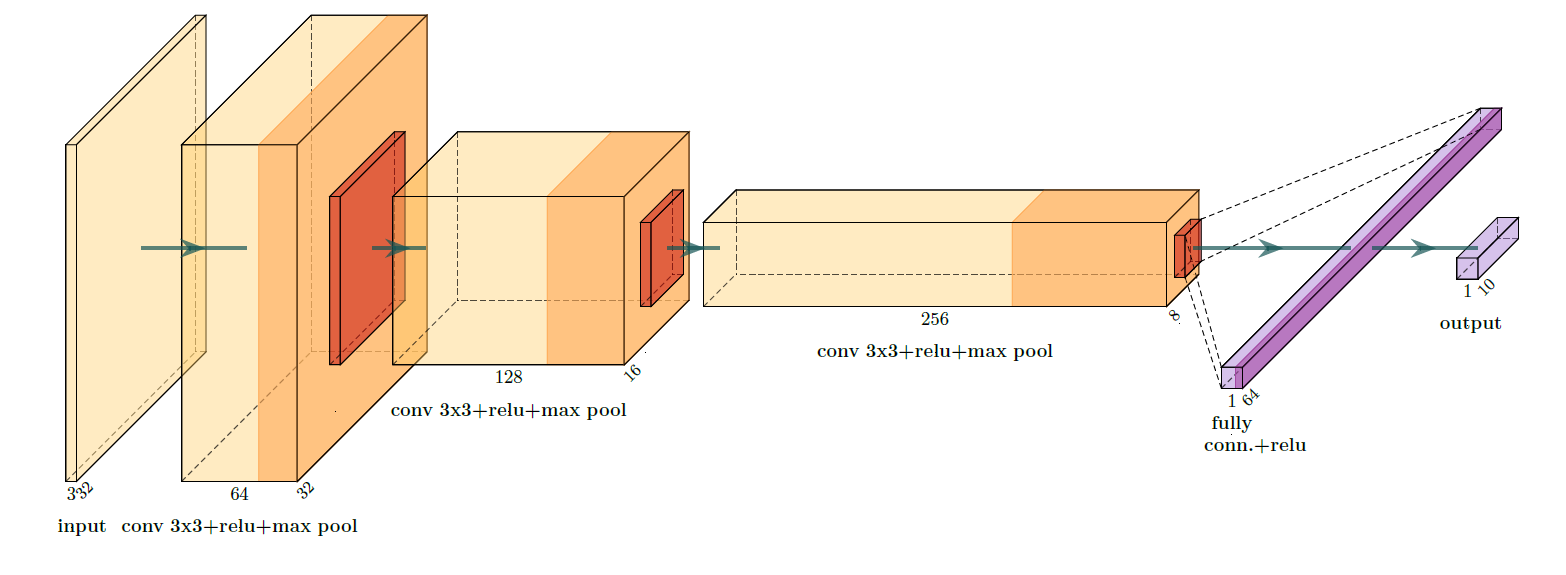

In [9]:
print(cnn_1)
print()
total_params = sum([math.prod(list(p.size())) for p in list(cnn_1.parameters())])
print("Total number of parameters:", total_params)

CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_layers): ModuleList(
    (0): Linear(in_features=4096, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=10, bias=True)
  )
)

Total number of parameters: 633674


### Train

In [10]:
%%time
cross_entropy = nn.CrossEntropyLoss()
adam_1 = optim.Adam(cnn_1.parameters(), lr=learning_rate)

losses_1, accuracies_1 = util.train_loop(model=cnn_1,
                                         loss_fn=cross_entropy,
                                         optimizer=adam_1,
                                         train_loader=train_loader,
                                         test_loader=test_loader,
                                         epochs=num_epochs,
                                         verbose=1)

Epoch: 1/50, Loss: 1.4399
Epoch: 1/50, Test Acc.: 50.79%
Epoch: 2/50, Loss: 0.9472
Epoch: 2/50, Test Acc.: 62.25%
Epoch: 3/50, Loss: 0.8929
Epoch: 3/50, Test Acc.: 67.93%
Epoch: 4/50, Loss: 0.7857
Epoch: 4/50, Test Acc.: 67.26%
Epoch: 5/50, Loss: 0.7769
Epoch: 5/50, Test Acc.: 67.63%
Epoch: 6/50, Loss: 0.8474
Epoch: 6/50, Test Acc.: 73.33%
Epoch: 7/50, Loss: 0.5215
Epoch: 7/50, Test Acc.: 74.66%
Epoch: 8/50, Loss: 0.6272
Epoch: 8/50, Test Acc.: 73.84%
Epoch: 9/50, Loss: 0.4324
Epoch: 9/50, Test Acc.: 73.92%
Epoch: 10/50, Loss: 0.5539
Epoch: 10/50, Test Acc.: 75.10%
Epoch: 11/50, Loss: 0.3648
Epoch: 11/50, Test Acc.: 74.93%
Epoch: 12/50, Loss: 0.4396
Epoch: 12/50, Test Acc.: 74.60%
Epoch: 13/50, Loss: 0.2882
Epoch: 13/50, Test Acc.: 73.80%
Epoch: 14/50, Loss: 0.2950
Epoch: 14/50, Test Acc.: 74.87%
Epoch: 15/50, Loss: 0.1529
Epoch: 15/50, Test Acc.: 74.60%
Epoch: 16/50, Loss: 0.2813
Epoch: 16/50, Test Acc.: 74.57%
Epoch: 17/50, Loss: 0.1917
Epoch: 17/50, Test Acc.: 74.88%
Epoch: 18/50, L

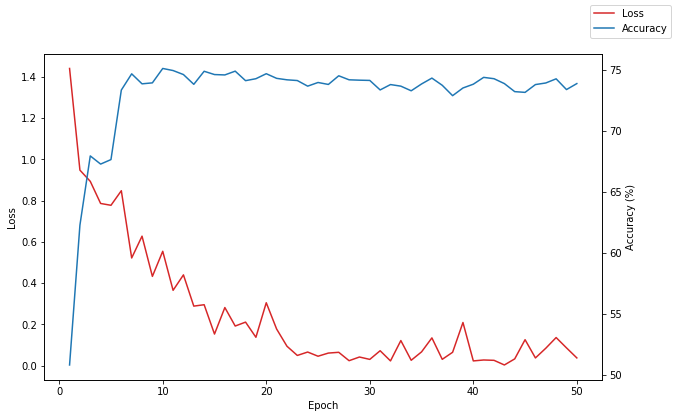

In [11]:
util.plot_loss(losses_1, accuracies_1)

## 4 conv + 1 fc layer model

In [12]:
cnn_2 = neural_nets.CNN(n_conv_layers=4,
                        filters=[64, 128, 256, 512],
                        kernel=[3, 3, 3, 3],
                        activation=['relu', 'relu', 'relu', 'relu'],
                        norm=[False, False, False, False],
                        pool=[2, 2, 2, 2],
                        input_channels=3,
                        fully_connected= [32],
                        input_dims=input_dimensions,
                        classes=target_classes)

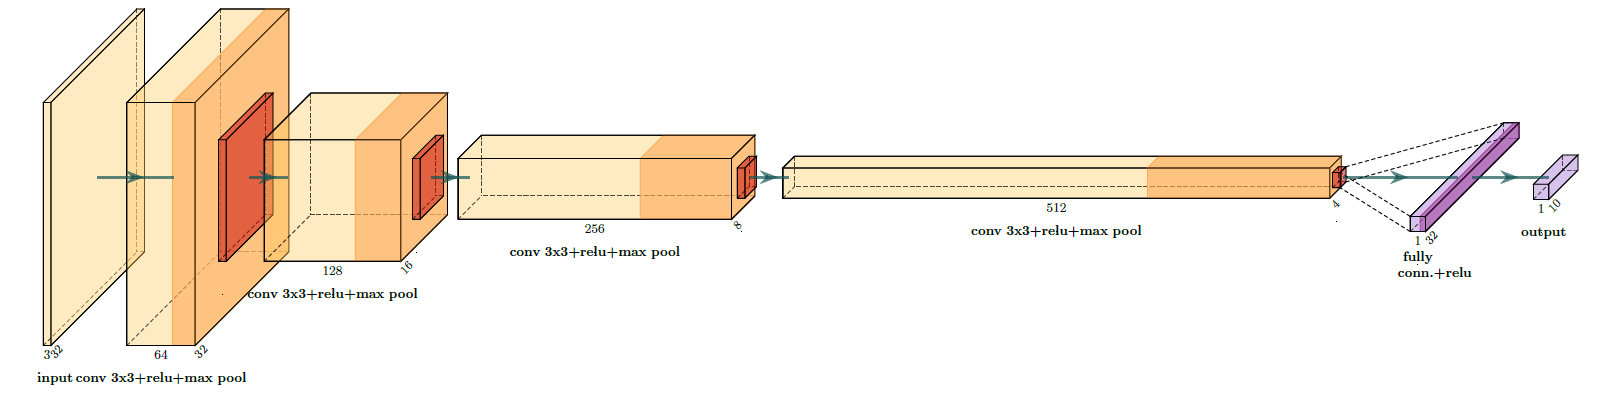

In [13]:
print(cnn_2)
print()
total_params = sum([math.prod(list(p.size())) for p in list(cnn_2.parameters())])
print("Total number of parameters:", total_params)

CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_layers): ModuleList(
    (0): Linear(in_features=2048, out_features=32, bias=True)

### Train

In [14]:
%%time
cross_entropy = nn.CrossEntropyLoss()
adam_2 = optim.Adam(cnn_2.parameters(), lr=learning_rate)

losses_2, accuracies_2 = util.train_loop(model=cnn_2,
                                         loss_fn=cross_entropy,
                                         optimizer=adam_2,
                                         train_loader=train_loader,
                                         test_loader=test_loader,
                                         epochs=num_epochs,
                                         verbose=1)

Epoch: 1/50, Loss: 1.1678
Epoch: 1/50, Test Acc.: 47.55%
Epoch: 2/50, Loss: 1.2038
Epoch: 2/50, Test Acc.: 60.33%
Epoch: 3/50, Loss: 1.0596
Epoch: 3/50, Test Acc.: 62.85%
Epoch: 4/50, Loss: 0.6849
Epoch: 4/50, Test Acc.: 68.43%
Epoch: 5/50, Loss: 0.8874
Epoch: 5/50, Test Acc.: 71.99%
Epoch: 6/50, Loss: 0.5627
Epoch: 6/50, Test Acc.: 74.56%
Epoch: 7/50, Loss: 0.5348
Epoch: 7/50, Test Acc.: 75.14%
Epoch: 8/50, Loss: 0.3768
Epoch: 8/50, Test Acc.: 75.24%
Epoch: 9/50, Loss: 0.4065
Epoch: 9/50, Test Acc.: 76.11%
Epoch: 10/50, Loss: 0.1570
Epoch: 10/50, Test Acc.: 74.45%
Epoch: 11/50, Loss: 0.2823
Epoch: 11/50, Test Acc.: 75.42%
Epoch: 12/50, Loss: 0.1444
Epoch: 12/50, Test Acc.: 74.17%
Epoch: 13/50, Loss: 0.0600
Epoch: 13/50, Test Acc.: 74.24%
Epoch: 14/50, Loss: 0.0479
Epoch: 14/50, Test Acc.: 75.90%
Epoch: 15/50, Loss: 0.0561
Epoch: 15/50, Test Acc.: 74.75%
Epoch: 16/50, Loss: 0.2344
Epoch: 16/50, Test Acc.: 74.79%
Epoch: 17/50, Loss: 0.1750
Epoch: 17/50, Test Acc.: 75.66%
Epoch: 18/50, L

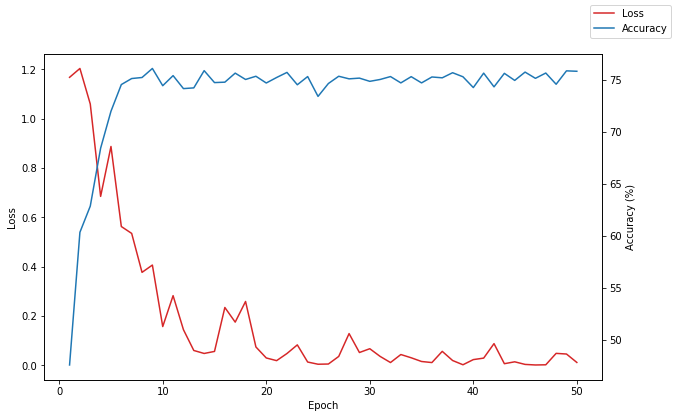

In [15]:
util.plot_loss(losses_2, accuracies_2)

## 3 VGG blocks + 1 fc layer model

In [16]:
cnn_3 = neural_nets.CNN(n_conv_layers=6,
                        filters=[64, 64, 128, 128, 256, 256],
                        kernel=[3, 3, 3, 3, 3, 3],
                        activation=['relu', 'relu', 'relu', 'relu', 'relu', 'relu'],
                        norm=[False, False, False, False, False, False],
                        pool=[0, 2, 0, 2, 0, 2],
                        input_channels=3,
                        fully_connected=[64],
                        input_dims=input_dimensions,
                        classes=target_classes)

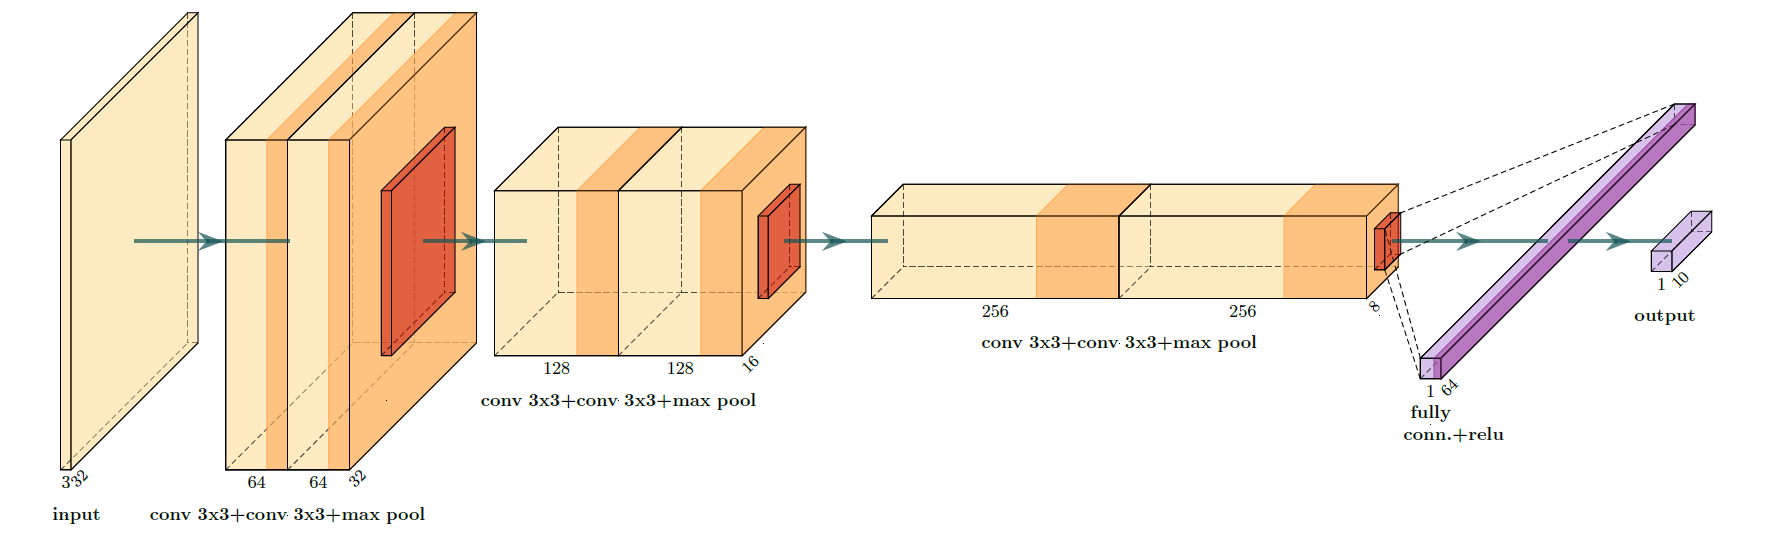

In [17]:
print(cnn_3)
print()
total_params = sum([math.prod(list(p.size())) for p in list(cnn_3.parameters())])
print("Total number of parameters:", total_params)

CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
    )
    (3): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
    )
    (5): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_

### Train

In [18]:
%%time
cross_entropy = nn.CrossEntropyLoss()
adam_3 = optim.Adam(cnn_3.parameters(), lr=learning_rate)

losses_3, accuracies_3 = util.train_loop(model=cnn_3,
                                         loss_fn=cross_entropy,
                                         optimizer=adam_3,
                                         train_loader=train_loader,
                                         test_loader=test_loader,
                                         epochs=num_epochs,
                                         verbose=1)

Epoch: 1/50, Loss: 1.7195
Epoch: 1/50, Test Acc.: 45.89%
Epoch: 2/50, Loss: 1.1423
Epoch: 2/50, Test Acc.: 60.24%
Epoch: 3/50, Loss: 0.8111
Epoch: 3/50, Test Acc.: 65.14%
Epoch: 4/50, Loss: 0.8074
Epoch: 4/50, Test Acc.: 69.94%
Epoch: 5/50, Loss: 0.6270
Epoch: 5/50, Test Acc.: 72.96%
Epoch: 6/50, Loss: 0.5236
Epoch: 6/50, Test Acc.: 76.10%
Epoch: 7/50, Loss: 0.3328
Epoch: 7/50, Test Acc.: 77.00%
Epoch: 8/50, Loss: 0.5060
Epoch: 8/50, Test Acc.: 77.28%
Epoch: 9/50, Loss: 0.4602
Epoch: 9/50, Test Acc.: 78.26%
Epoch: 10/50, Loss: 0.2747
Epoch: 10/50, Test Acc.: 78.66%
Epoch: 11/50, Loss: 0.2187
Epoch: 11/50, Test Acc.: 78.43%
Epoch: 12/50, Loss: 0.2138
Epoch: 12/50, Test Acc.: 78.29%
Epoch: 13/50, Loss: 0.1498
Epoch: 13/50, Test Acc.: 77.63%
Epoch: 14/50, Loss: 0.1434
Epoch: 14/50, Test Acc.: 78.09%
Epoch: 15/50, Loss: 0.1031
Epoch: 15/50, Test Acc.: 77.84%
Epoch: 16/50, Loss: 0.0983
Epoch: 16/50, Test Acc.: 78.53%
Epoch: 17/50, Loss: 0.0441
Epoch: 17/50, Test Acc.: 78.18%
Epoch: 18/50, L

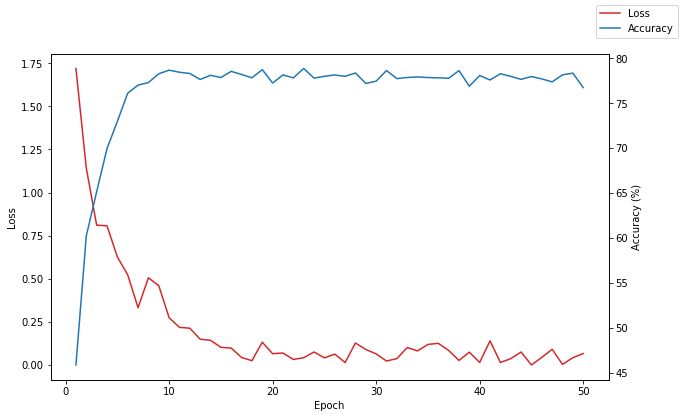

In [19]:
util.plot_loss(losses_3, accuracies_3)

## 3 VGG blocks + 2 fc layers model

In [20]:
cnn_4 = neural_nets.CNN(n_conv_layers=6,
                        filters=[64, 64, 128, 128, 256, 256],
                        kernel=[3, 3, 3, 3, 3, 3],
                        activation=['relu', 'relu', 'relu', 'relu', 'relu', 'relu'],
                        norm=[False, False, False, False, False, False],
                        pool=[0, 2, 0, 2, 0, 2],
                        input_channels=3,
                        fully_connected=[32, 64],
                        input_dims=input_dimensions,
                        classes=target_classes)

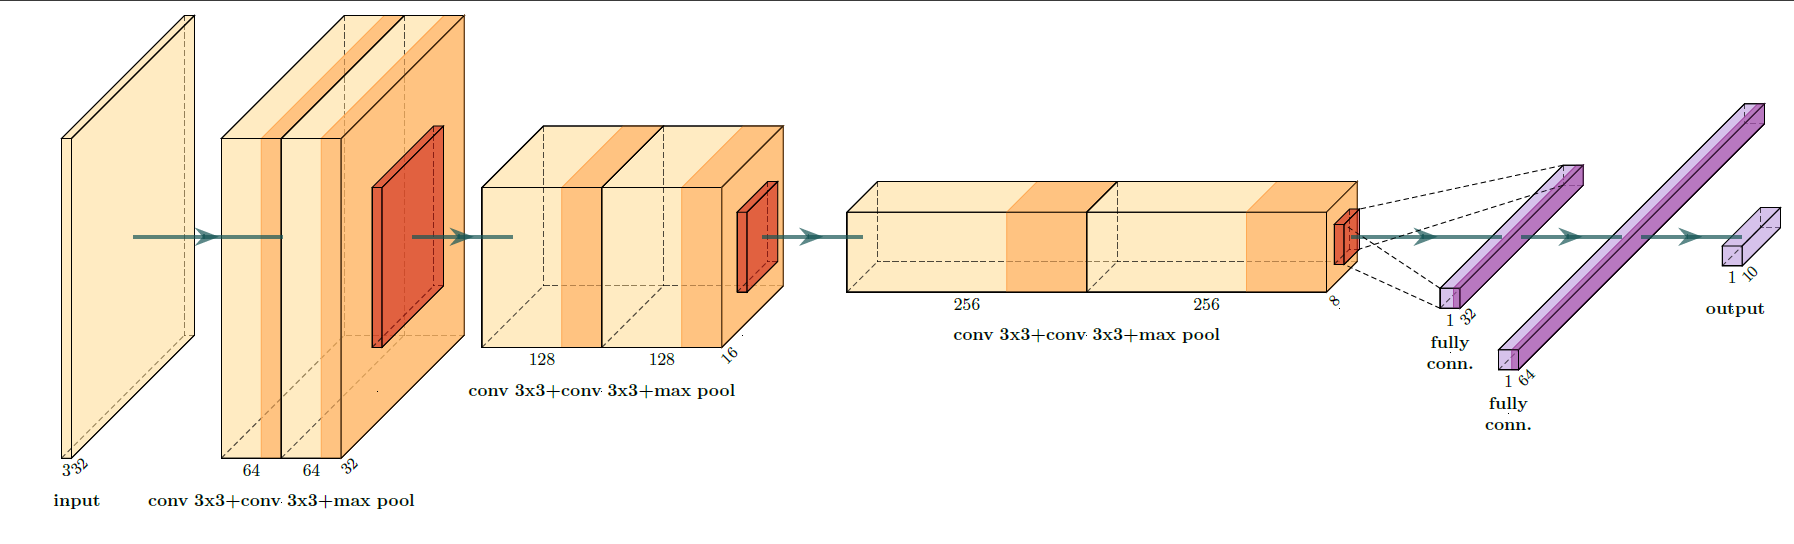

In [21]:
print(cnn_4)
print()
total_params = sum([math.prod(list(p.size())) for p in list(cnn_4.parameters())])
print("Total number of parameters:", total_params)

CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
    )
    (3): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
    )
    (5): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_

### Train

In [22]:
%%time
cross_entropy = nn.CrossEntropyLoss()
adam_4 = optim.Adam(cnn_4.parameters(), lr=learning_rate)

losses_4, accuracies_4 = util.train_loop(model=cnn_4,
                                         loss_fn=cross_entropy,
                                         optimizer=adam_4,
                                         train_loader=train_loader,
                                         test_loader=test_loader,
                                         epochs=num_epochs,
                                         verbose=1)

Epoch: 1/50, Loss: 1.5739
Epoch: 1/50, Test Acc.: 43.52%
Epoch: 2/50, Loss: 1.2488
Epoch: 2/50, Test Acc.: 56.98%
Epoch: 3/50, Loss: 0.9413
Epoch: 3/50, Test Acc.: 64.18%
Epoch: 4/50, Loss: 0.7268
Epoch: 4/50, Test Acc.: 67.33%
Epoch: 5/50, Loss: 0.9121
Epoch: 5/50, Test Acc.: 70.67%
Epoch: 6/50, Loss: 0.6089
Epoch: 6/50, Test Acc.: 73.13%
Epoch: 7/50, Loss: 0.4758
Epoch: 7/50, Test Acc.: 75.87%
Epoch: 8/50, Loss: 0.5149
Epoch: 8/50, Test Acc.: 75.62%
Epoch: 9/50, Loss: 0.4135
Epoch: 9/50, Test Acc.: 77.08%
Epoch: 10/50, Loss: 0.2412
Epoch: 10/50, Test Acc.: 77.10%
Epoch: 11/50, Loss: 0.2817
Epoch: 11/50, Test Acc.: 76.74%
Epoch: 12/50, Loss: 0.3258
Epoch: 12/50, Test Acc.: 75.73%
Epoch: 13/50, Loss: 0.1468
Epoch: 13/50, Test Acc.: 76.93%
Epoch: 14/50, Loss: 0.2147
Epoch: 14/50, Test Acc.: 75.40%
Epoch: 15/50, Loss: 0.0677
Epoch: 15/50, Test Acc.: 77.27%
Epoch: 16/50, Loss: 0.0713
Epoch: 16/50, Test Acc.: 75.97%
Epoch: 17/50, Loss: 0.1624
Epoch: 17/50, Test Acc.: 75.95%
Epoch: 18/50, L

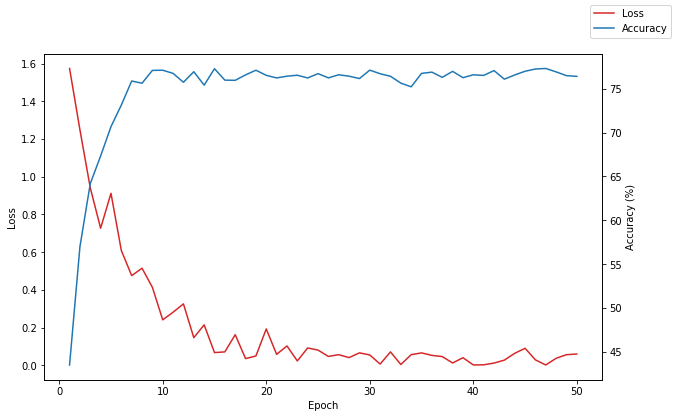

In [23]:
util.plot_loss(losses_4, accuracies_4)